# CW - Solutions

# Q1(a) 
Read in the csv file 'Covid_19.csv' to create a dataframe. Remove the 21 columns named 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'tests_units', 'continent', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'total_boosters', 'total_boosters_per_hundred', 'extreme_poverty', 'female_smokers', 'male_smokers', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality' and 'excess_mortality_cumulative_per_million'. Remove any rows where the 'iso_code' equals any of these 19 "OWID_AFR", "OWID_ASI", "OWID_ENG", "OWID_EUR", "OWID_EUN", "OWID_HIC", "OWID_KOS", "OWID_LIC", "OWID_LMC", "OWID_NAM", "OWID_CYN", "OWID_NIR", "OWID_OCE", "OWID_SCT", "OWID_SAM", "OWID_UMC", "OWID_WLS", "OWID_WRL", or "RUS". Remove rows where the population is 
less than 40000000. Without using any built-in functions: create a function to convert a date in the format YYYY-MM-DD (Year, Month, Day) into a single number representing the number of days from 1st January 2020 to the date given, ensure that the date 1st January 2020 gives an output of 1. Apply your function to the date column of your data frame put the output in a new column called "Days". (10 marks)

In [1]:
#importing required packages

import pandas as pd
import numpy as np

In [2]:
#Reading datafile into pandas and given name as df

df = pd.read_csv("C:/Users/Asus/OneDrive - Aston University/coursework/actual coursework/Covid_19.csv")

#Removing the given columns from the dataset

df = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients_per_million','total_boosters_per_hundred','human_development_index', 'excess_mortality_cumulative_absolute',
'excess_mortality_cumulative',  'excess_mortality_cumulative_per_million', 'continent', 'icu_patients', 'male_smokers', 'female_smokers', 'hosp_patients', 'total_boosters', 'extreme_poverty', 'tests_units', 'weekly_hosp_admissions', 'excess_mortality'])

#removing the given rows from iso_code column and given the name of dataframe as df2

drop_rows = ["OWID_AFR","OWID_ASI","OWID_ENG","OWID_EUR", "OWID_EUN","OWID_HIC", "OWID_KOS", "OWID_LIC", "OWID_LMC", "OWID_NAM", "OWID_CYN", "OWID_NIR", "OWID_OCE", "OWID_SCT","OWID_SAM", "OWID_UMC", "OWID_WLS", "OWID_WRL", "RUS"]
df2 = df[~df['iso_code'].isin(drop_rows)]

#removing population row below 40000000 and given name as df_new

df_new = df2[df2["population"]>40000000]



In [3]:
#converting days column into numbers from 01,jan,2020

def day_conversion(date_str):
    date_object = pd.to_datetime(date_str, format='%Y-%m-%d')
    daysfrom2020 = (date_object - pd.Timestamp('2020-01-01')).days + 1
    return daysfrom2020

df_new['Days'] = df_new['date'].apply(day_conversion)

#printing out dataframe
df_new

C:\Users\Asus\AppData\Local\Temp\ipykernel_17252\1937838525.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Days'] = df_new['date'].apply(day_conversion)


,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,Days
0,AFG,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,41128772.0,3
1,AFG,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,41128772.0,4
2,AFG,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,41128772.0,5
3,AFG,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,41128772.0,6
4,AFG,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,41128772.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336804,VNM,Vietnam,2023-09-23,11623560.0,47.0,29.000,43206.0,0.0,0.0,118382.037,...,7.150,4.718,6171.884,245.465,6.00,85.847,2.6,75.40,98186856.0,1362
336805,VNM,Vietnam,2023-09-24,11623571.0,11.0,28.429,43206.0,0.0,0.0,118382.149,...,7.150,4.718,6171.884,245.465,6.00,85.847,2.6,75.40,98186856.0,1363
336806,VNM,Vietnam,2023-09-25,11623571.0,0.0,25.429,43206.0,0.0,0.0,118382.149,...,7.150,4.718,6171.884,245.465,6.00,85.847,2.6,75.40,98186856.0,1364
336807,VNM,Vietnam,2023-09-26,11623571.0,0.0,21.571,43206.0,0.0,0.0,118382.149,...,7.150,4.718,6171.884,245.465,6.00,85.847,2.6,75.40,98186856.0,1365


# Q1(b) 
Create a list containing the countries that remain. Using Matplotlib, for each country in your list, do the following: 

Let p equal the maximum number of 'new_cases_smoothed' divided by the maximum number of 'new_deaths_smoothed'. 
Overlay a plot of 'new_deaths_smoothed' against 'Days' with a plot of 
'new_cases_smoothed' divide by p. 
Label the graph, and include the location in the title. Include a legend which gives p rounded to 1 decimal place.

Pick a country and comment on how the 'new_deaths_smoothed' and 
'new_cases_smoothed' compare with each other. (6 marks)

In [4]:
#importing required libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#listed the location into unique list and named as df_countries

df_countries=df_new["location"].unique().tolist()

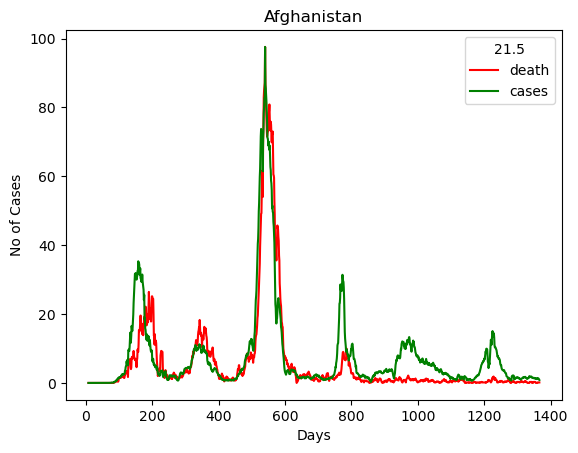

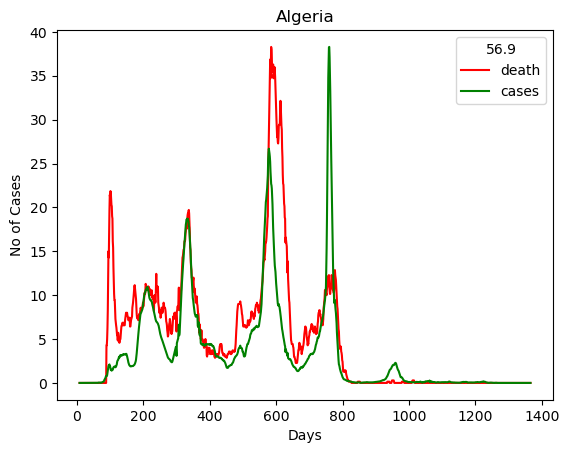

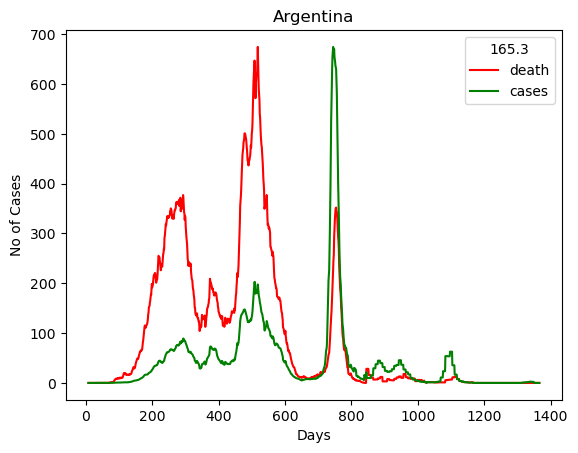

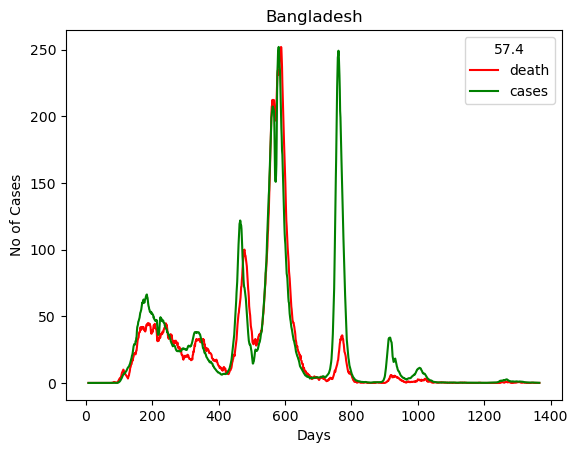

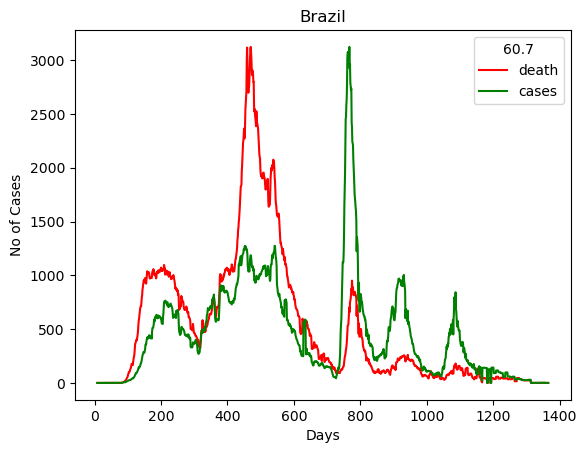

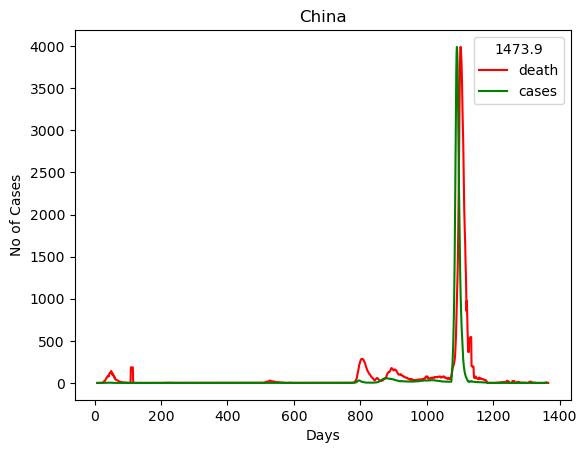

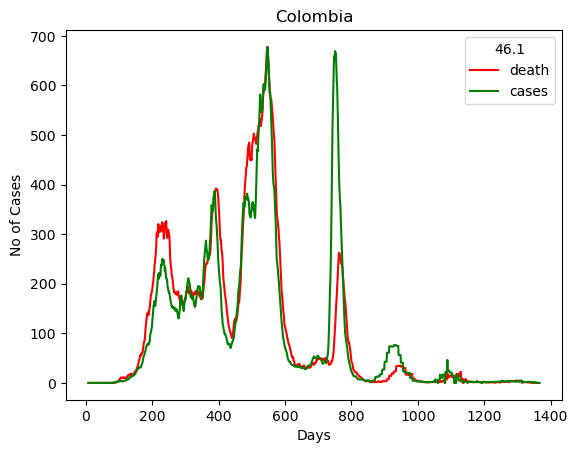

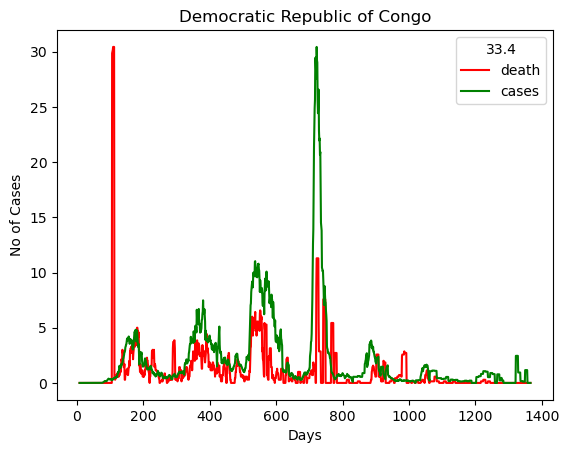

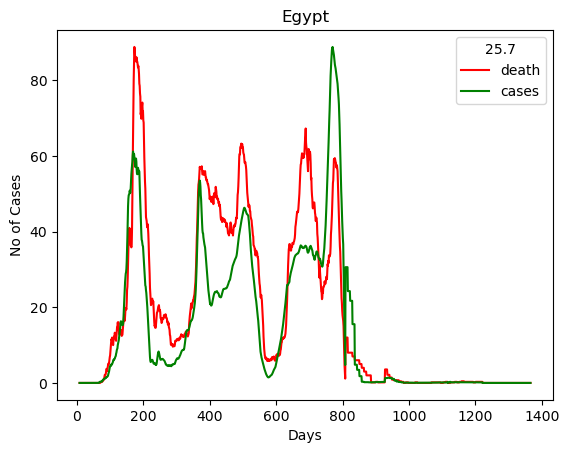

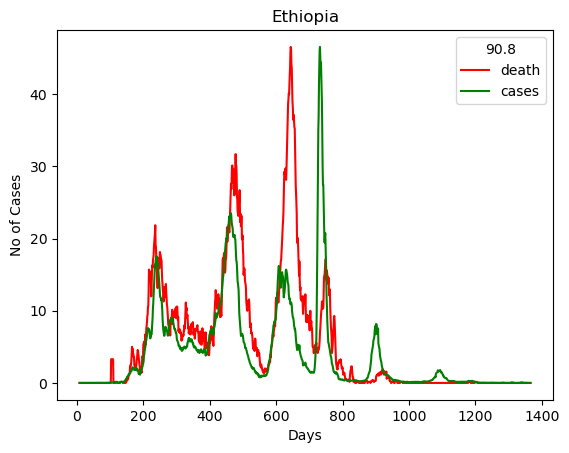

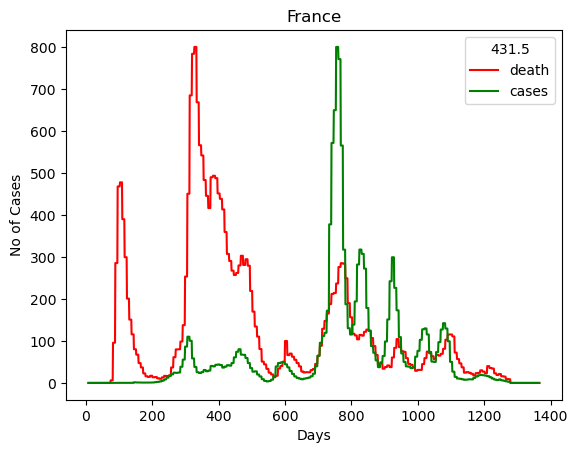

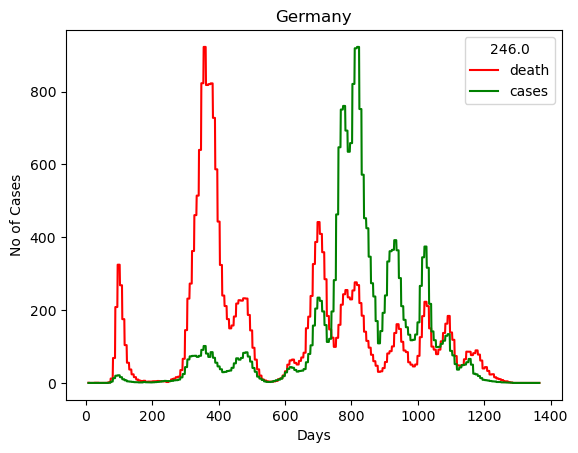

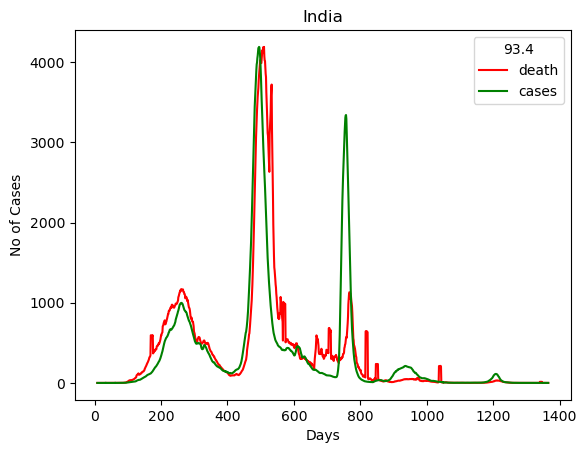

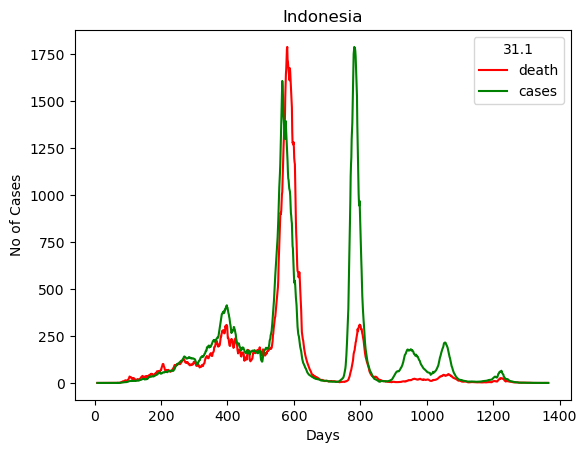

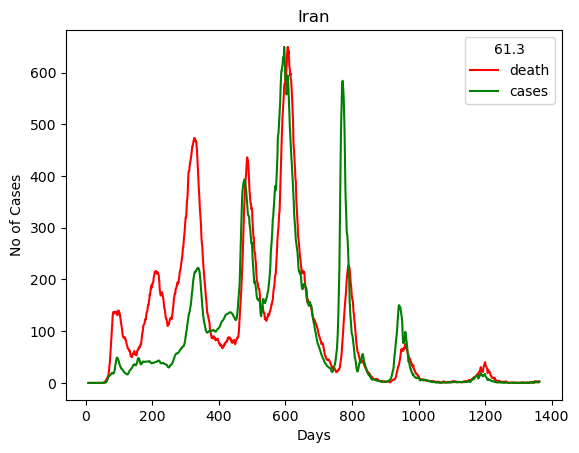

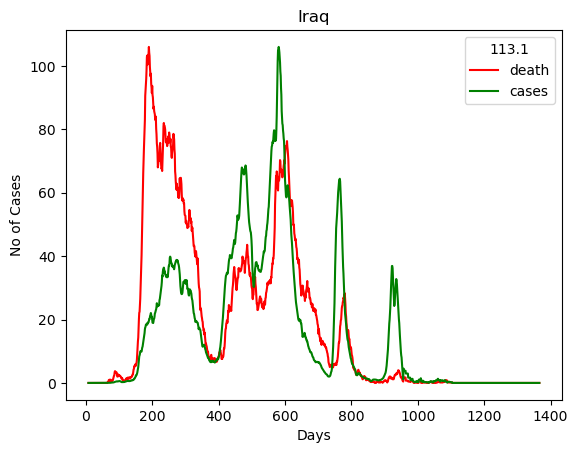

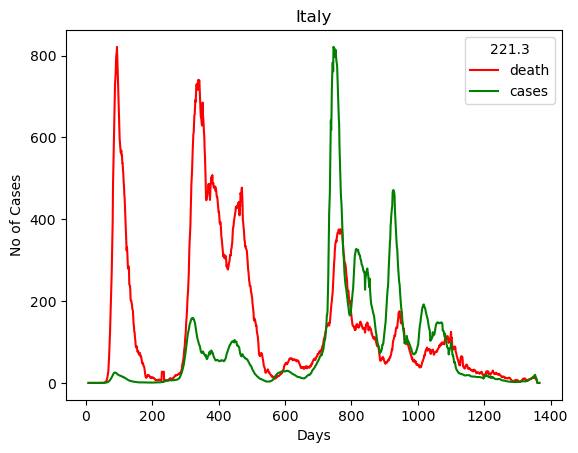

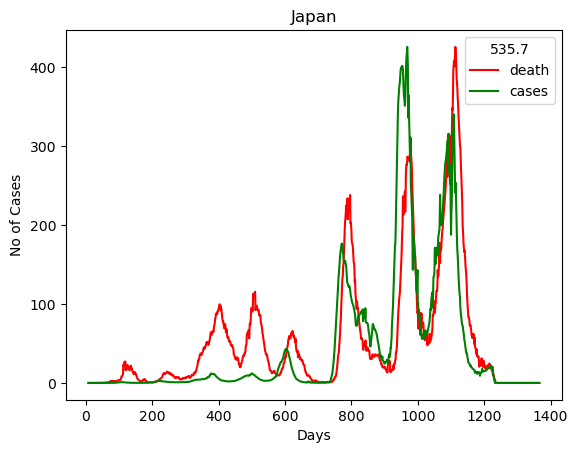

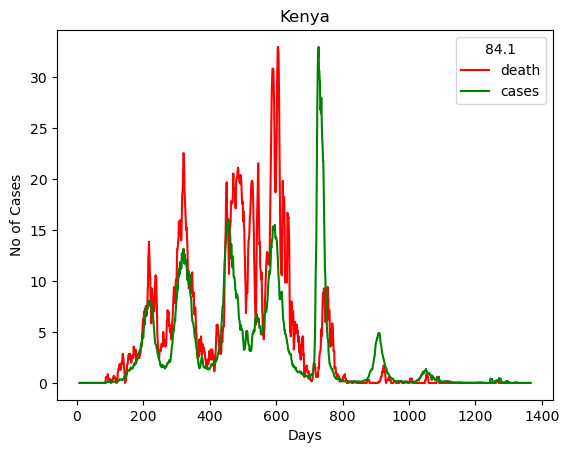

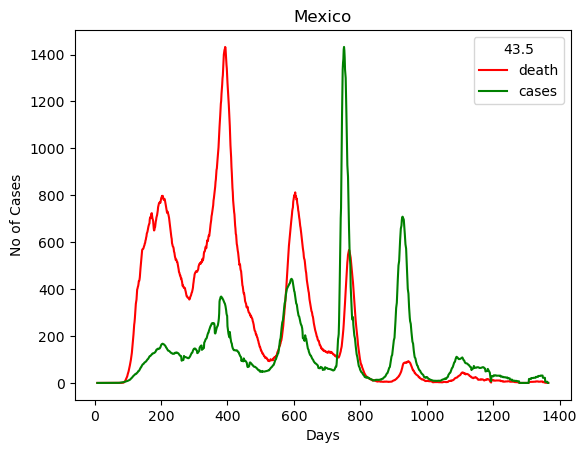

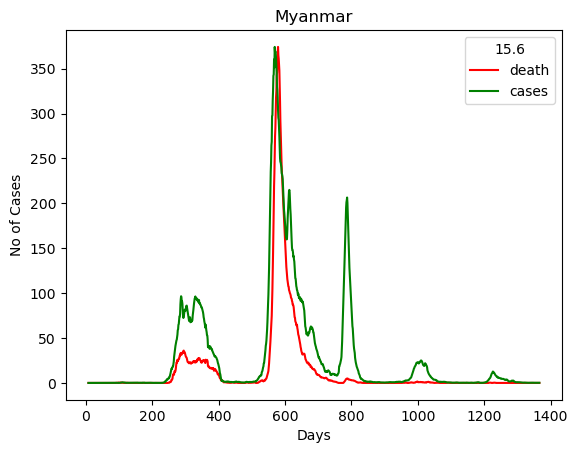

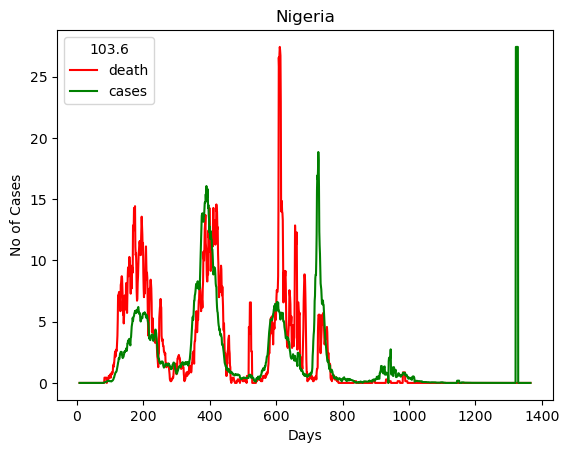

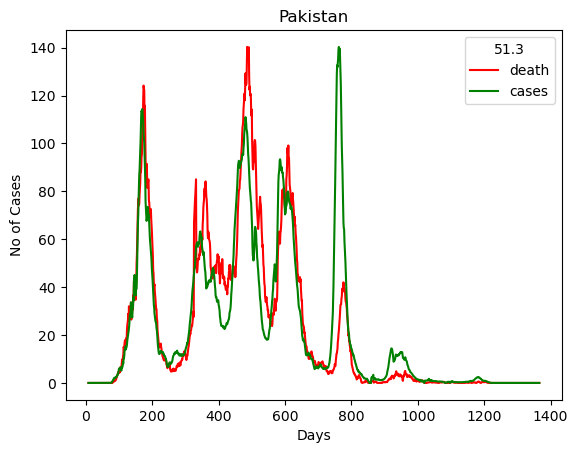

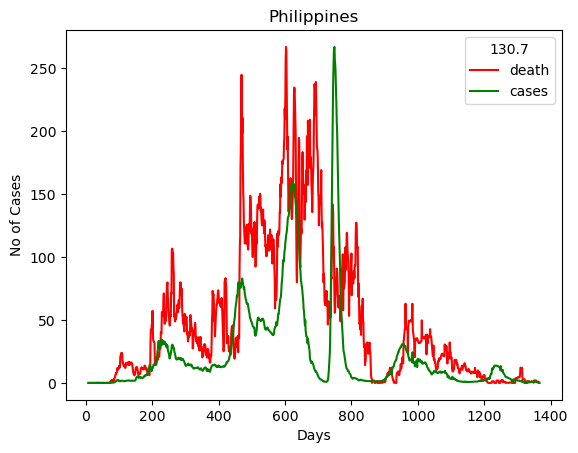

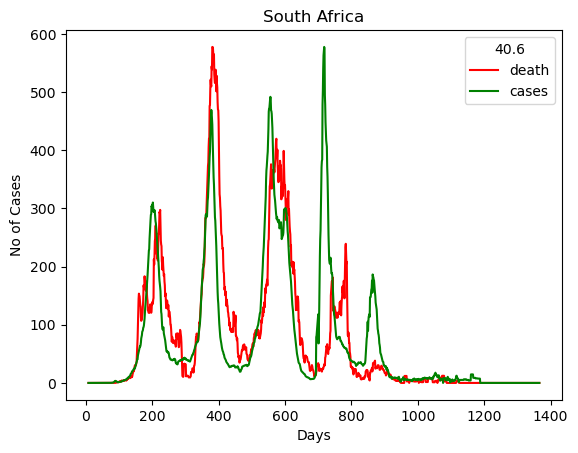

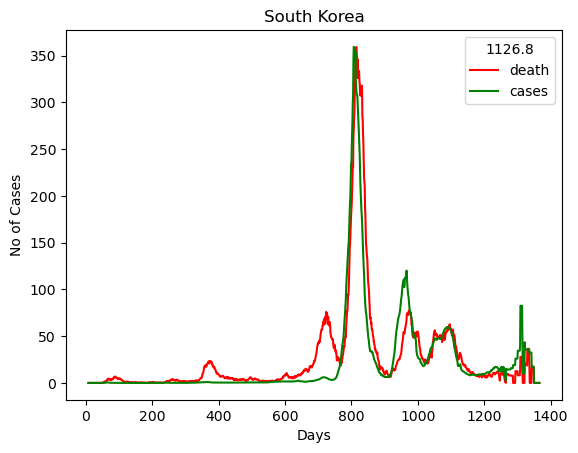

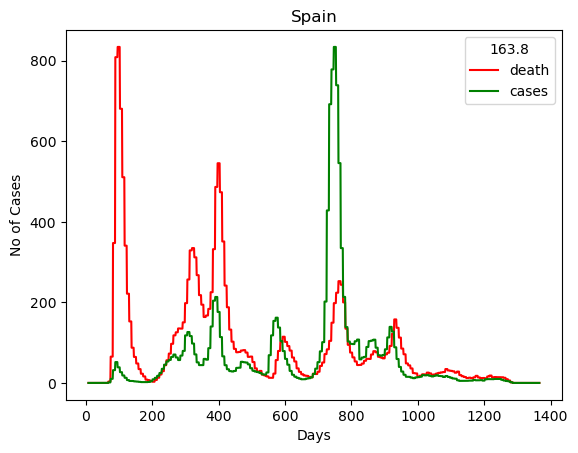

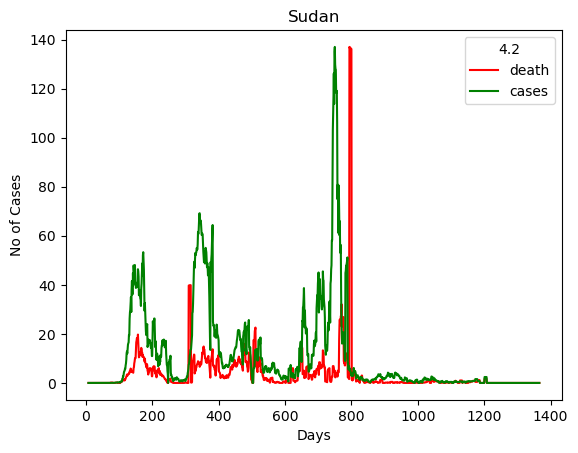

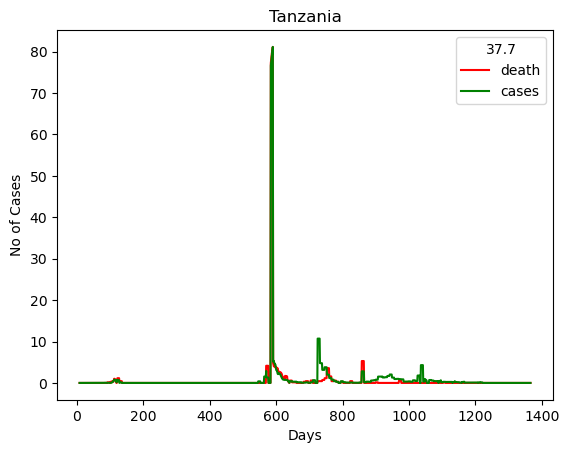

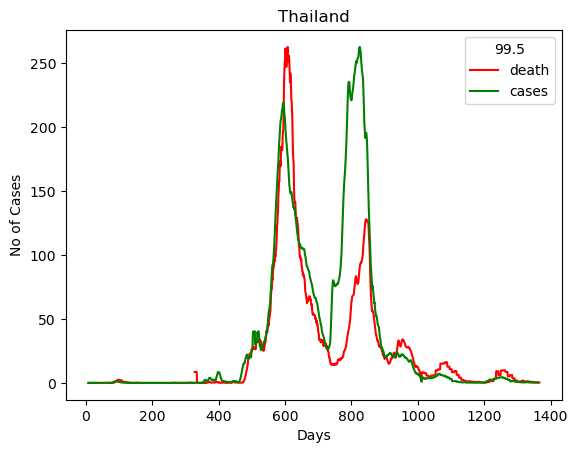

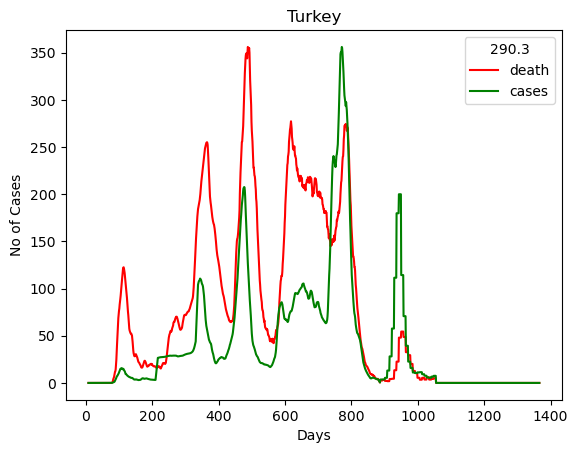

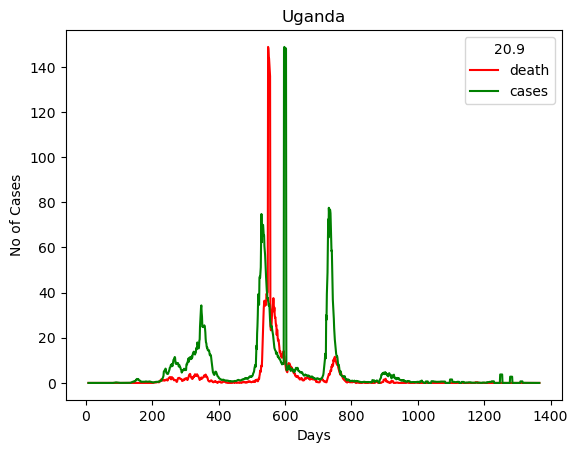

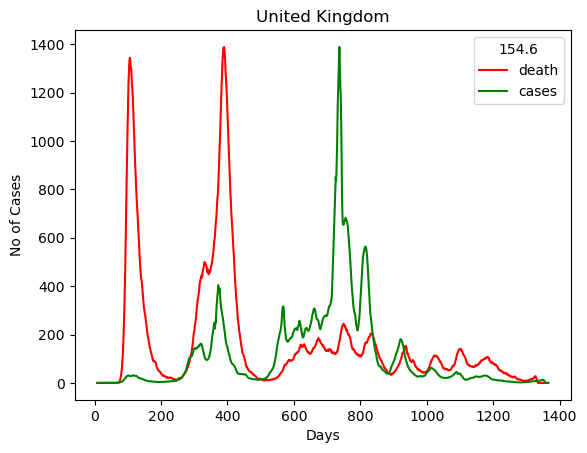

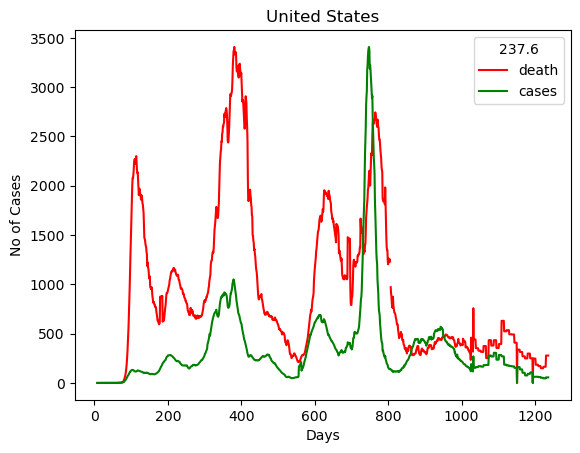

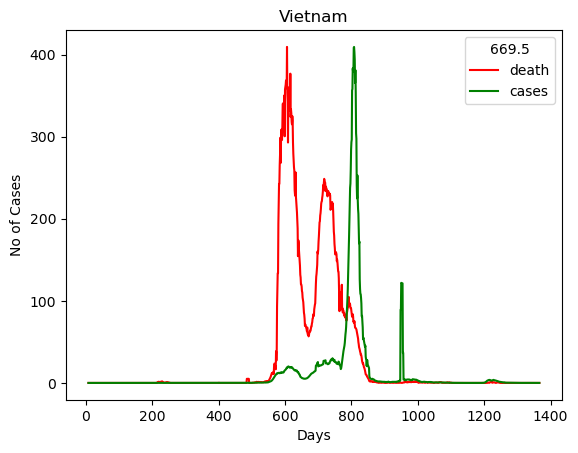

In [5]:
#using the for loop to plot the graph of all the given countries

for i in range(0,len(df_countries)):
    g1=[df_countries[i]]
    g1 = df_new[df_new['location'].isin(g1)]
    p=g1['new_cases_smoothed'].max()/g1['new_deaths_smoothed'].max()
    plt.plot(g1['Days'],g1['new_deaths_smoothed'],label='death',color='red')   
    plt.plot(g1['Days'],g1['new_cases_smoothed']/p,label='cases',color='green')
    plt.title(df_countries[i])  #naming the graph
    plt.xlabel('Days')
    plt.ylabel('No of Cases')
    plt.legend(title=round(p,1))
    plt.show()

In [6]:
#with the given plot, i have taken India, here no of death and no of cases goes gradually gone  to a peak around 500 to 600 days
#And its gradully reduced from there. India controlled the death rate to lower than 1000 in between 700 to 900 days


# Q1(c) 
Using Matplotlib, for each country in your list, do the following: 

Let q equal the median number of 'total_cases' divided by the median number of 'total_deaths'. 
Overlay a plot of 'total_deaths' against 'Days' with a plot of 'total_cases' divide by q. 
Label the graph, and include the location in the title. Include a legend which gives q rounded to 1 decimal place. (4 marks)

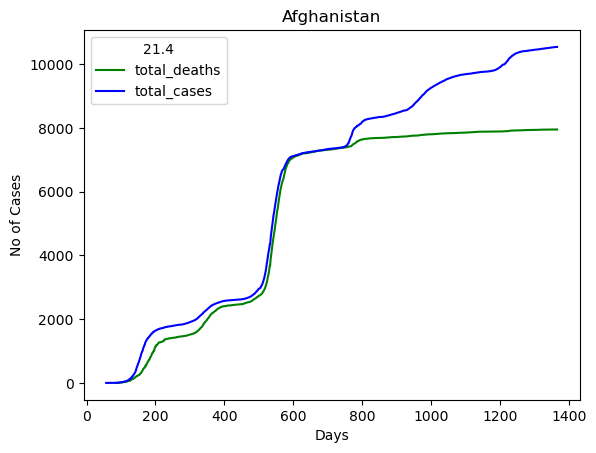

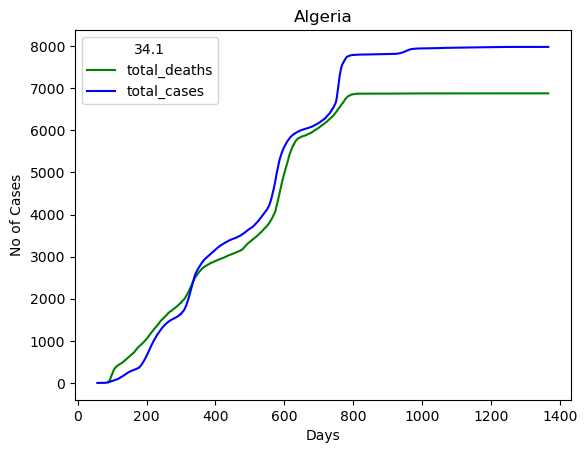

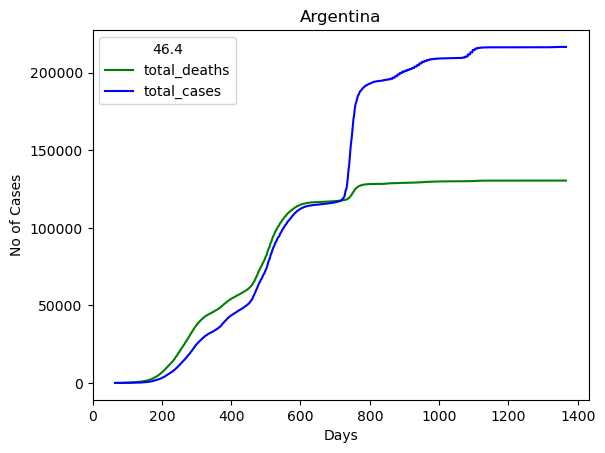

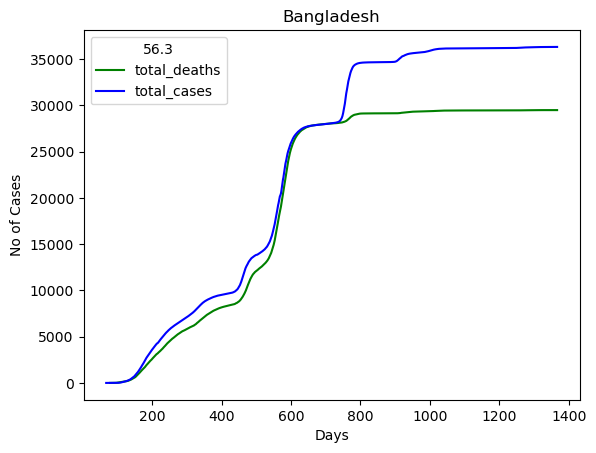

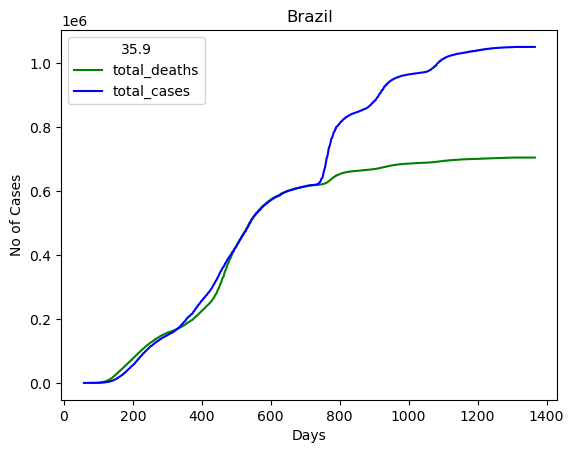

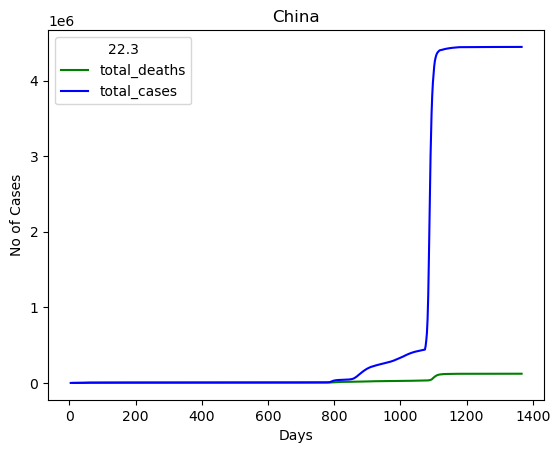

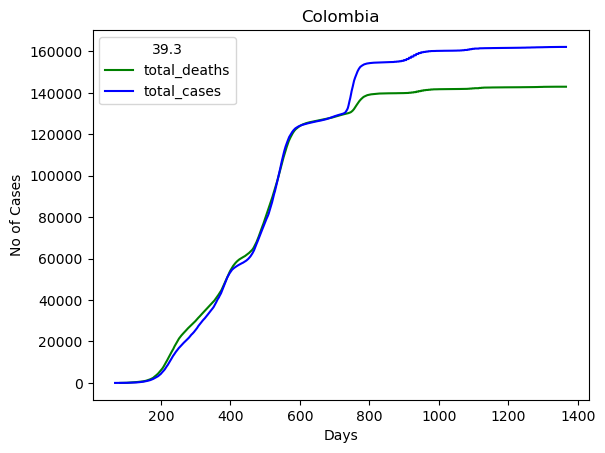

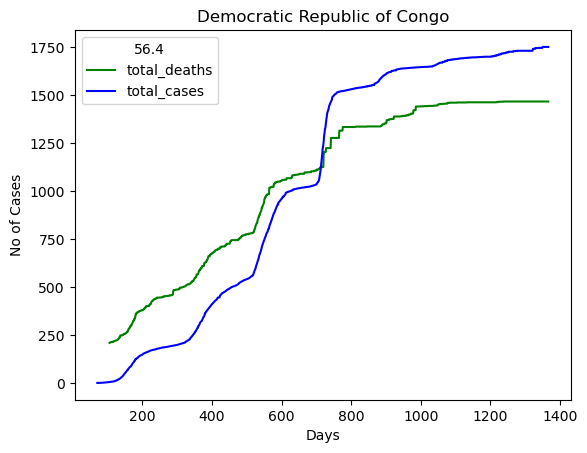

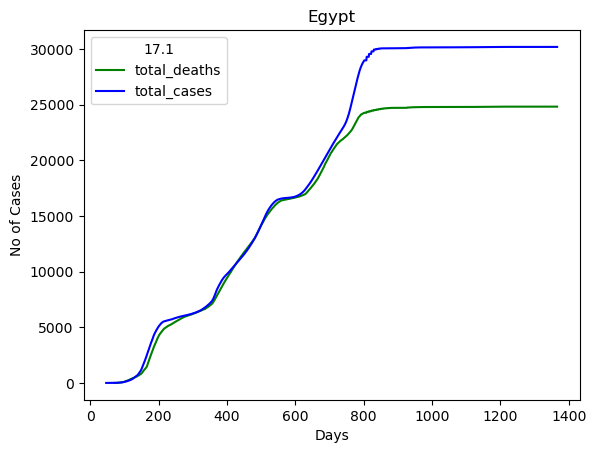

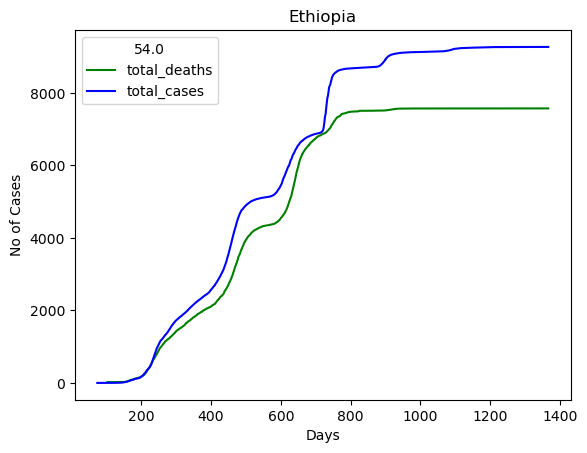

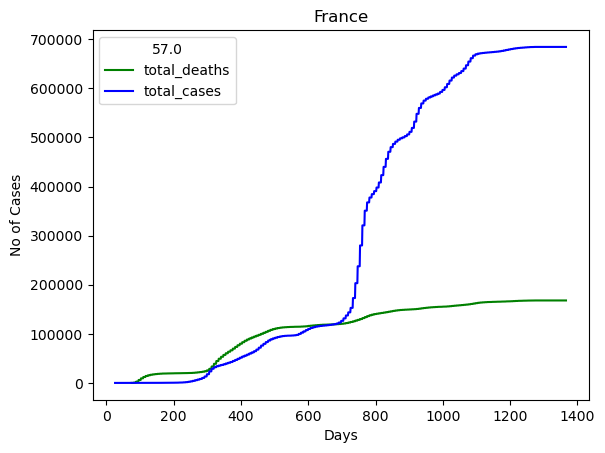

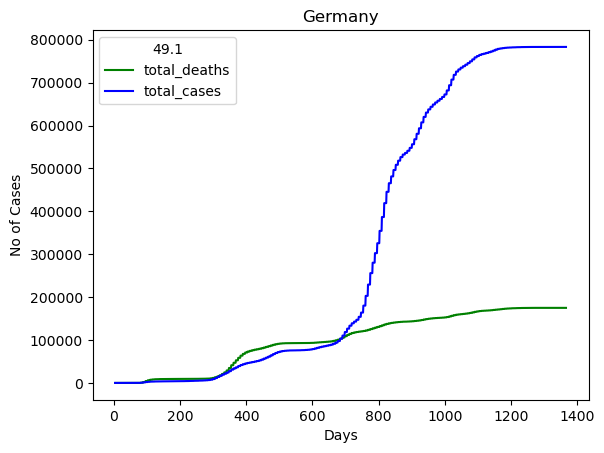

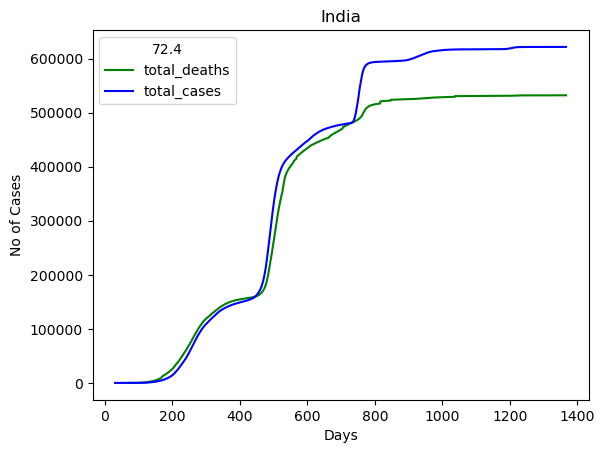

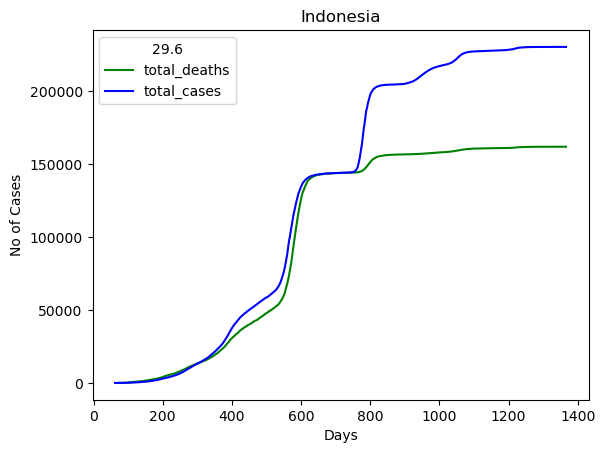

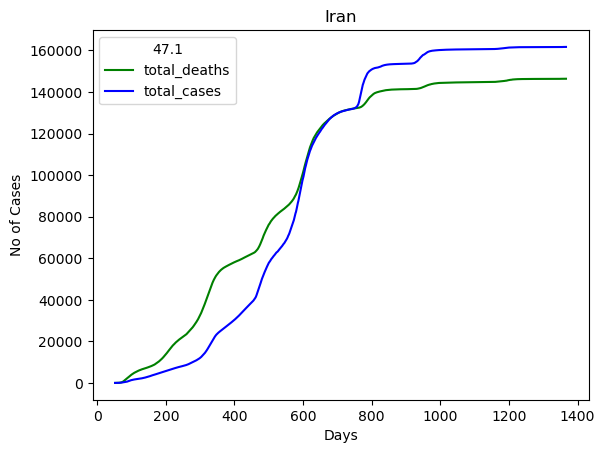

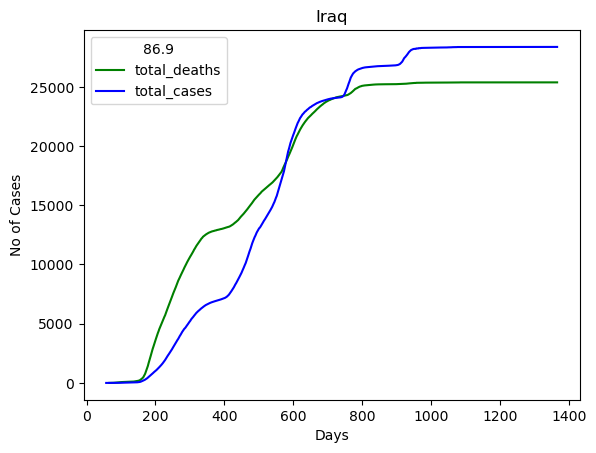

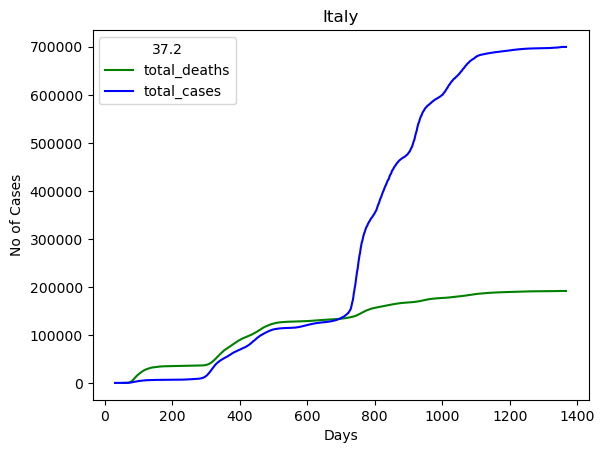

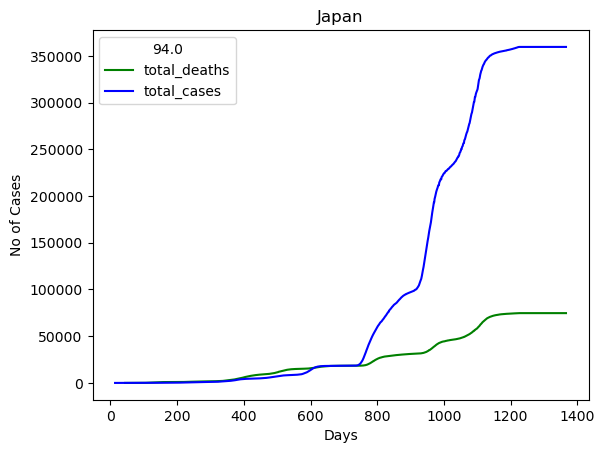

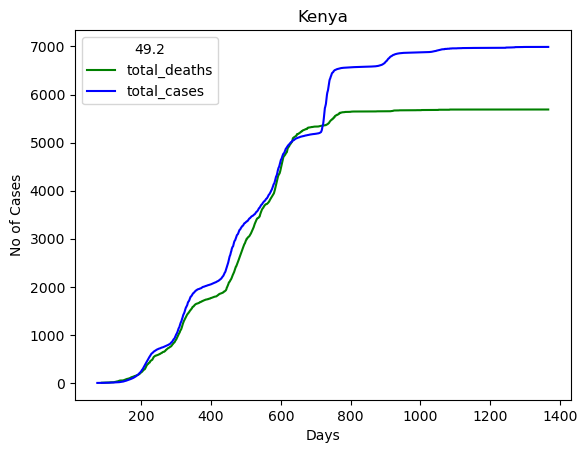

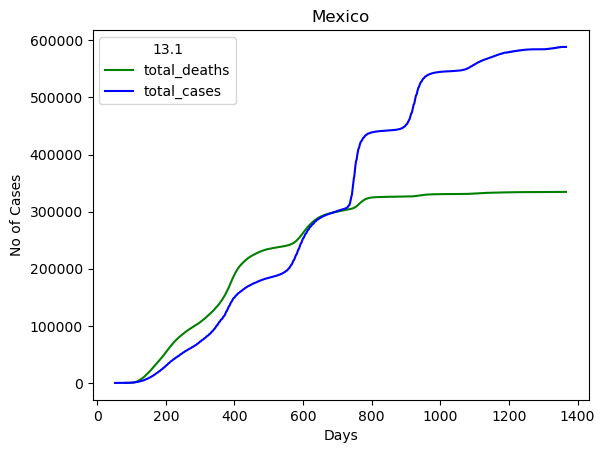

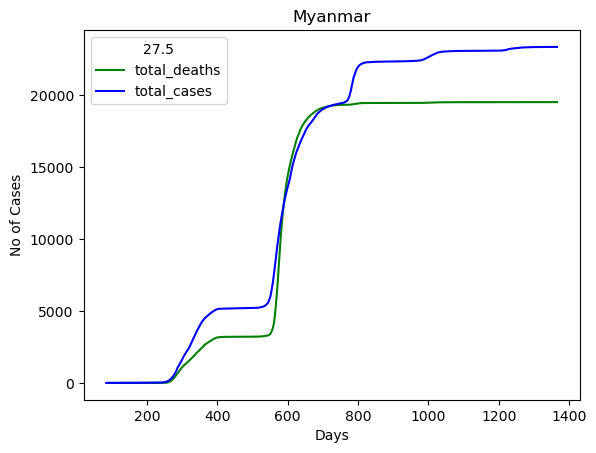

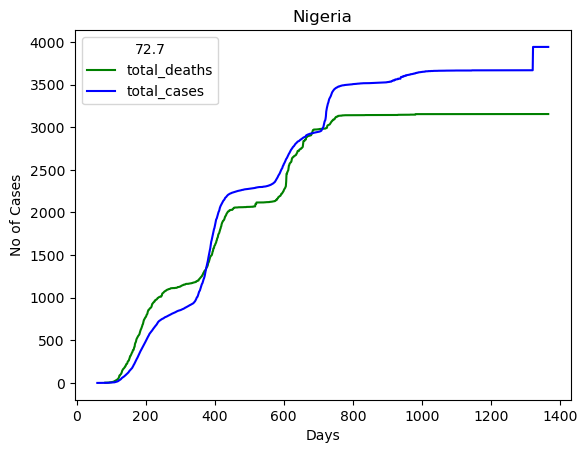

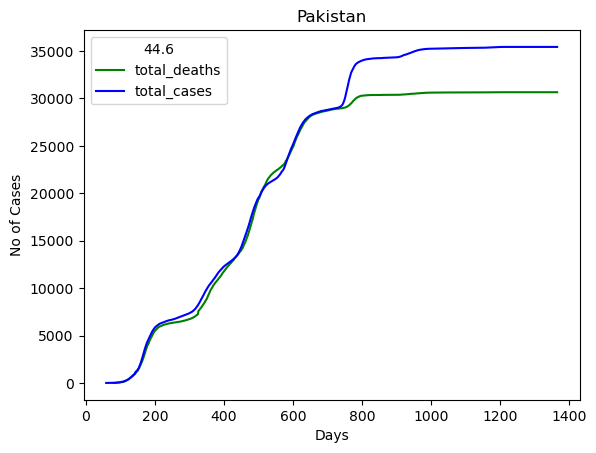

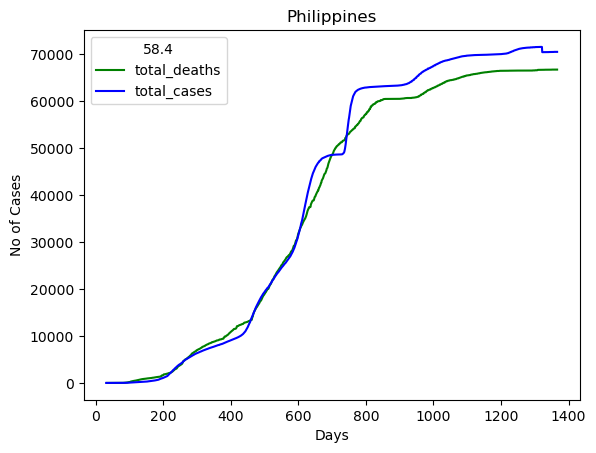

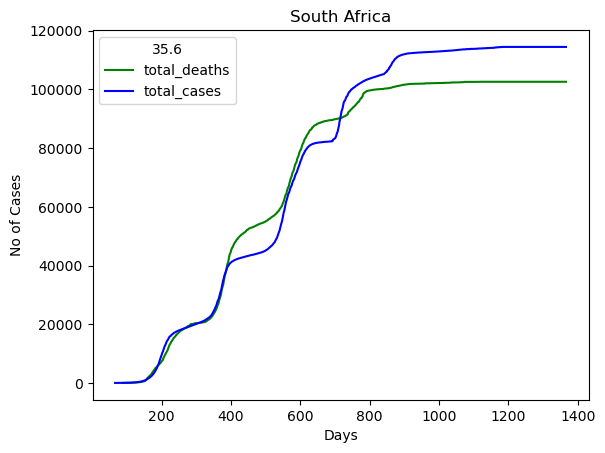

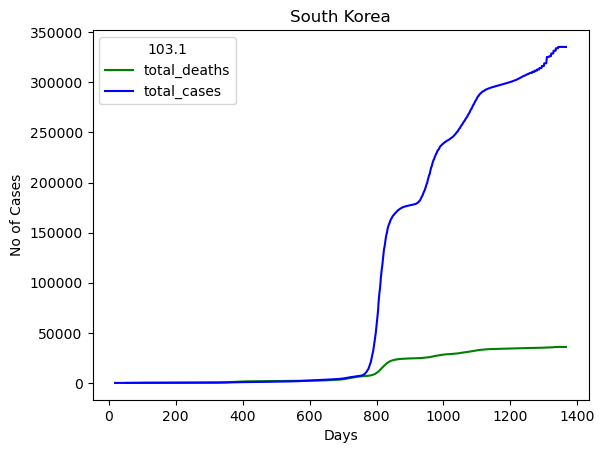

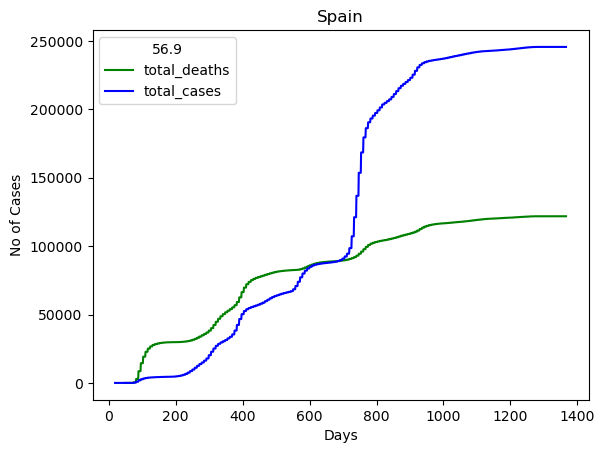

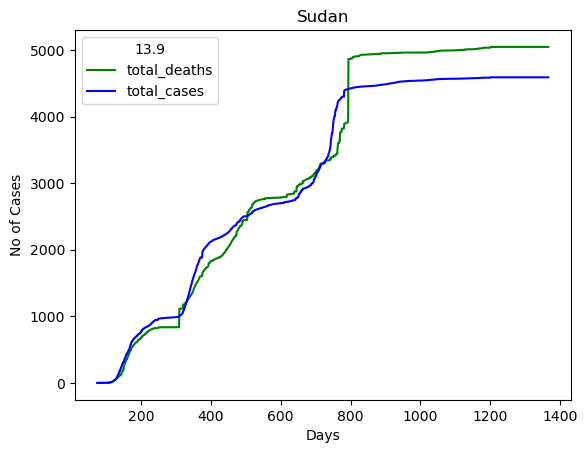

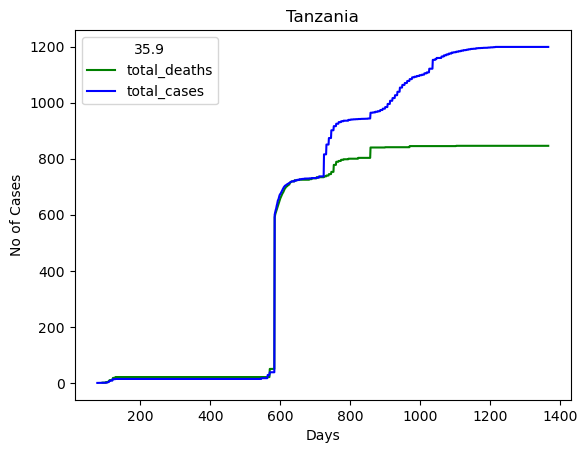

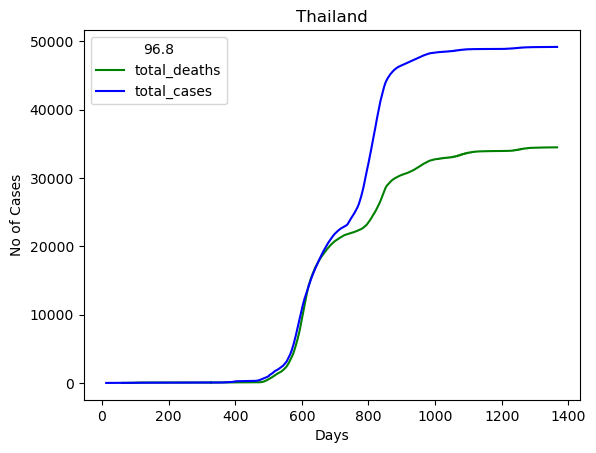

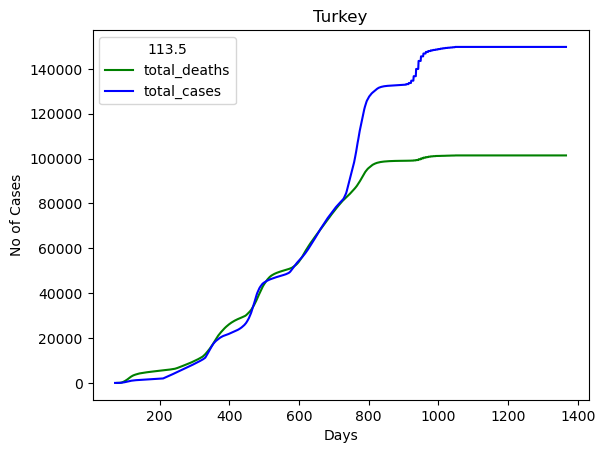

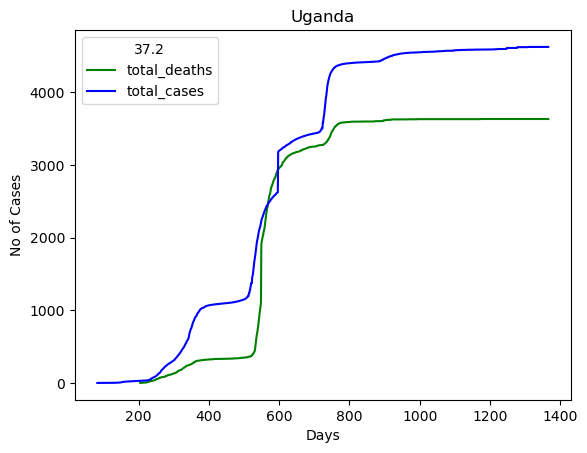

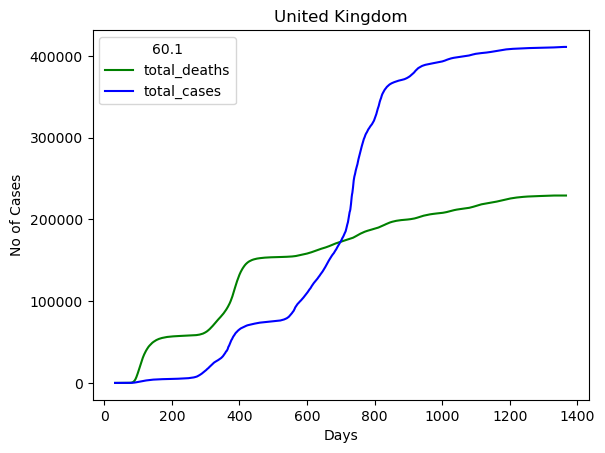

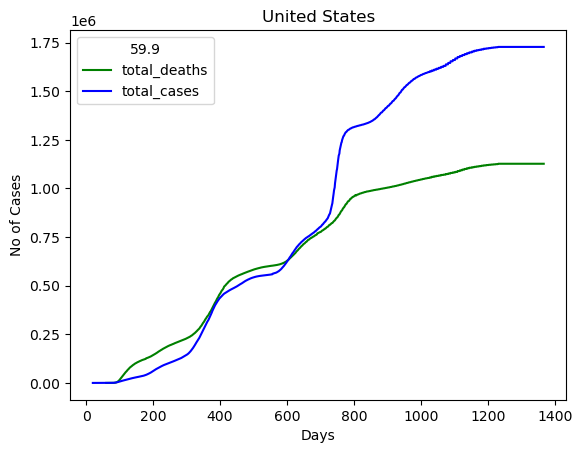

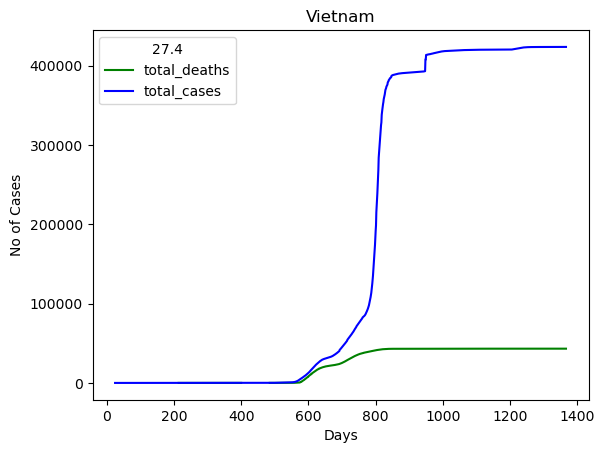

In [7]:
#Plotting the graph using for loop

for i in range(0,len(df_countries)):
    g1=[df_countries[i]]
    g1 = df_new[df_new['location'].isin(g1)]
    q=g1['total_cases'].median()/g1['total_deaths'].median()
    plt.plot(g1['Days'],g1['total_deaths'],label='total_deaths',color='green')
    plt.plot(g1['Days'],g1['total_cases']/q,label='total_cases',color='blue')
    plt.title(df_countries[i])
    plt.xlabel('Days')
    plt.ylabel('No of Cases')
    plt.legend(title=round(q,1))
    plt.show()

# Q1(d) 
Obtain the correlation matrix of the data frame. Determine any 
correlations greater than 0.98 or less than -0.6. Discuss some 
strong correlations. (4 marks)

In [8]:
#applying the correlation condition and naming it as num

num = df_new.select_dtypes(include=['number'])
cor_matrix= num.corr().round(3)

In [9]:
#taking the correlations greater than 0.98 and less than -0.6

strong = cor_matrix[(cor_matrix >0.98 ) | (cor_matrix <-0.6)]


In [10]:
#we are getting strong correlation with linear relationship of 2 variables, 
#we have taking that with greater than 0.98 and less than -0.6

In [11]:
#printing strong corelations

strong



,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,Days
total_cases,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q1(e)
Remove the columns 'location' and 'date'. 
Create a model to predict the 'life_expectancy' using the following 8 columns: 
'population_density', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 
'median\_age', 'gdp_per_capita', 'diabetes_prevalence', 'population'.  

You should split the data into (80\%) training data and (20\%) test data. Use an appropriate linear regression 
model from sklearn to predict the 'life_expectancy'. Test your model using the test data set. Obtain the Mean Absolute Error, Mean Squared Error, and R-squared. First calculate them without a built in function, then calculate them using built-in functions. 
Create a scatter plot of the predicted values against the actual values. Discuss the accuracy of your model using your results. (12 marks)

In [12]:
#importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Remove 'location' and 'date'
df3 = df_new.drop(['location', 'date'], axis=1)

# Define features and target
X = df3[['population_density', 'aged_65_older', 'aged_70_older', 
              'cardiovasc_death_rate', 'median_age', 'gdp_per_capita', 
              'diabetes_prevalence', 'population']]
y = df3['life_expectancy']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy using the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics without built-in functions
n = len(y_test)
# Initialize an empty dictionary to store metric results
m_results = {}

# Iterate over each metric name in the list
for m_name in ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']:

    # Define the appropriate metric function based on the metric name
    if m_name == 'Mean Absolute Error':
        # Lambda function to calculate Mean Absolute Error
        m_func = lambda y_true, y_pred: np.mean(np.abs(y_true - y_pred))
         # Lambda function to calculate Mean Squared Error
            
    elif m_name == 'Mean Squared Error':
        # Lambda function to calculate Mean Squared Error
        m_func = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2)
    else:
        # Use the built-in r2_score function to calculate R-squared
        m_func = r2_score
        
    # Calculate the metric using the defined function and store the result in the dictionary
    m_results[m_name] = m_func(y_test, y_pred)


# Calculate evaluation metrics using built-in functions
MAE_withbuiltin = mean_absolute_error(y_test, y_pred)
MSE_withbuitlin = mean_squared_error(y_test, y_pred)
r_squared_withbuiltin = r2_score(y_test, y_pred)

# Display evaluation metrics
print('Metrics without built-in functions:')
for m_name, m_value in m_results.items():
    print(f'{m_name}: {m_value:.2f}')
print("\nMean Absolute Error (using built-in function):", MAE_withbuiltin.round(2))
print("Mean Squared Error (using built-in function):", MSE_withbuitlin.round(2))
print("R-squared (using built-in function):", r_squared_withbuiltin.round(2))


Metrics without built-in functions:
Mean Absolute Error: 1.92
Mean Squared Error: 6.95
R-squared: 0.87

Mean Absolute Error (using built-in function): 1.92
Mean Squared Error (using built-in function): 6.95
R-squared (using built-in function): 0.87


In [13]:
#we are getting same values for both built-in function and without built-in function, 
#here R-squared value is below decimal value so we will get good accuracy 

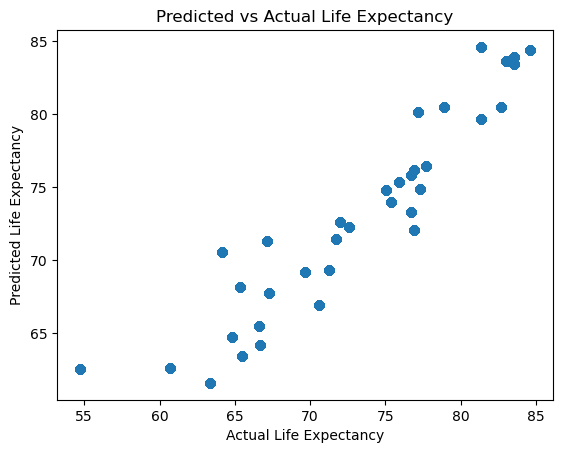

In [14]:
# Create scatter plot of predicted values against actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predicted vs Actual Life Expectancy')
plt.show()

In [15]:
#here we plotted graph with actual and predicted life expectancy

# Q1(f)
Make a copy of the dataframe. Create 
a model to predict the 'iso_code' using the 3 columns 'total_cases', 'total_deaths' and 'Days'. Only use the following 12 'iso_code's: 
'AFG', 'DZA', 'BGD', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN', 'PAK', 'KOR', 'ZAF'. 

Only use the rows where 'total_cases' and 'total_deaths' are greater than or equal to 1. You should split the data into (80%) training data and (20%) test data. Use an appropriate classification model from sklearn to predict the 'iso_code'. Test your model using the test data set and obtain the accuracy. Create a scatter plot of the predicted 'iso_codes' against the actual 'iso_codes'. Discuss the accuracy of your model using your results. (10 marks)

In [16]:
#importing libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#taking copy of dataframe
df4 = df_new.copy()

#filtering out the countries to create a model
iso_codes = ['AFG', 'DZA', 'BGD', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN', 'PAK', 'KOR', 'ZAF']
filtered_df4 = df4[df4['iso_code'].isin(iso_codes) & (df4['total_cases'] >= 1) & (df4['total_deaths'] >= 1)]


# Select relevant columns for model training
features = ['total_cases', 'total_deaths', 'Days']
X = filtered_df4[features]
y = filtered_df4['iso_code']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 99.26%


In [17]:
#here we used random forest model to predict the accuracy for given 12 countries and we are getting 99% accuracy
#with using rows of total death, total cases and days

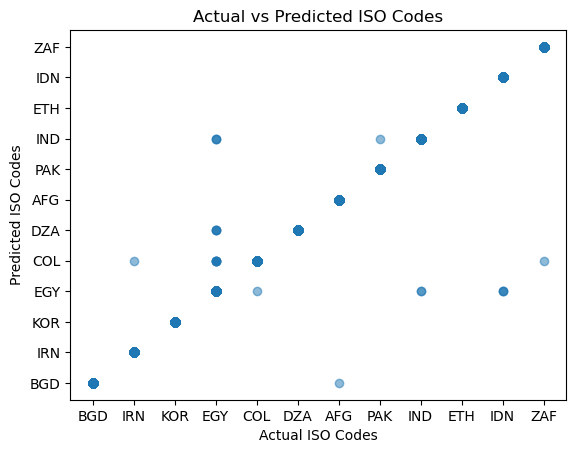

In [18]:
# Scatter plot of predicted vs actual iso codes
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted ISO Codes')
plt.xlabel('Actual ISO Codes')
plt.ylabel('Predicted ISO Codes')
plt.show()

In [19]:
#we plotted a graph with actual and predicted iso_codes

# 1(g)
You are going to predict the 'iso_code' using the 4 columns 'total_cases', 'total_deaths', 'total_vaccinations' and 'Days'. Only use the following 12 'iso_code's: 

'AFG', 'BRA', 'CHN', 'FRA', 'IND', 'ITA', 
'MEX', 'PAK', 'ZAF', 'GBR', 'USA', 'VNM'. 

Only use the rows where 'total_cases' and 'total_deaths' and 'total_vaccinations' are greater than or equal to 1. Normalise the 4 columns 'total_cases', 'total_deaths', 'total_vaccinations' and 'Days' using the max-min scalar. You now should split the data into (80%) training data and (20%) test data. Create any classification model you like using PyTorch to predict the 'iso_code'; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training accuracy. Create a scatter plot of the predicted 'iso_codes' against the actual 'iso_codes'. Discuss the accuracy of your model using your results. (16 marks)

In [20]:
#importing required libraries

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Epoch [50/1890], Loss: 0.2534
Epoch [100/1890], Loss: 0.1645
Epoch [150/1890], Loss: 0.1196
Epoch [200/1890], Loss: 0.0854
Epoch [250/1890], Loss: 0.0677
Epoch [300/1890], Loss: 0.0550
Epoch [350/1890], Loss: 0.0450
Epoch [400/1890], Loss: 0.0381
Epoch [450/1890], Loss: 0.0332
Epoch [500/1890], Loss: 0.0294
Epoch [550/1890], Loss: 0.0261
Epoch [600/1890], Loss: 0.0229
Epoch [650/1890], Loss: 0.0201
Epoch [700/1890], Loss: 0.0172
Epoch [750/1890], Loss: 0.0151
Epoch [800/1890], Loss: 0.0134
Epoch [850/1890], Loss: 0.0120
Epoch [900/1890], Loss: 0.0106
Epoch [950/1890], Loss: 0.0096
Epoch [1000/1890], Loss: 0.0087
Epoch [1050/1890], Loss: 0.0081
Epoch [1100/1890], Loss: 0.0075
Epoch [1150/1890], Loss: 0.0069
Epoch [1200/1890], Loss: 0.0065
Epoch [1250/1890], Loss: 0.0061
Epoch [1300/1890], Loss: 0.0057
Epoch [1350/1890], Loss: 0.0054
Epoch [1400/1890], Loss: 0.0050
Epoch [1450/1890], Loss: 0.0048
Epoch [1500/1890], Loss: 0.0045
Epoch [1550/1890], Loss: 0.0042
Epoch [1600/1890], Loss: 0.0

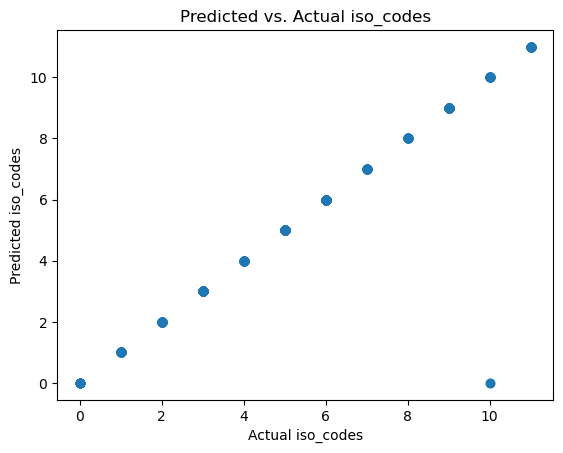

In [21]:

# Load the data
mydata = df_new.copy()

# Filter the data
iso_codes = ['AFG', 'BRA', 'CHN', 'FRA', 'IND', 'ITA', 'MEX', 'PAK', 'ZAF', 'GBR', 'USA', 'VNM']
mydata = mydata[mydata['iso_code'].isin(iso_codes)]
mydata = mydata[(mydata['total_cases'] >= 1) & (mydata['total_deaths'] >= 1) & (mydata['total_vaccinations'] >= 1)]

# Check if 'days' column is present
if 'days' not in mydata.columns:
    # Create 'days' column if it's not present
    mydata['days'] = mydata.groupby('iso_code').cumcount() + 1

# Normalize the feature columns
features = ['total_cases', 'total_deaths', 'total_vaccinations', 'days']
scaler = MinMaxScaler()
mydata[features] = scaler.fit_transform(mydata[features])

# Split the data into training and test sets
X = mydata[features]
y = mydata['iso_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(pd.get_dummies(y_train).values).float()
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(pd.get_dummies(y_test).values).float()

# Define the PyTorch model
class IsoCodeClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(IsoCodeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 120)  # Reduced the size of the hidden layer
        self.fc2 = nn.Linear(120,64)
        self.fc3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Initialize the model, criterion, and optimizer
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = IsoCodeClassifier(input_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)  # Reduced learning rate for better convergence

# Train the model
num_epochs = 1890  # Increased number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to train mode
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:  # Print loss every 50 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred_classes == torch.argmax(y_test, dim=1)).float().mean()
    print(f'Test accuracy: {accuracy * 100:.2f}%')
    # Plot predicted vs. actual 'iso_codes'
    plt.scatter(torch.argmax(y_test, dim=1), y_pred_classes)
    plt.xlabel('Actual iso_codes')
    plt.ylabel('Predicted iso_codes')
    plt.title('Predicted vs. Actual iso_codes')
    plt.show()

In [22]:
#from this training and testing model we are getting 100% which is showing that our model is 
#predicted the exact output for the given 12 countries using pytorch model 

# Q1(h)

Using SQLite Studio. 
Read in the csv file 'Covid_19.csv' to create a table. 
Remove the 21 columns named 
'weekly_icu_admissions', 'continent',
'weekly_icu_admissions_per_million', 'icu_patients', 
'weekly_hosp_admissions_per_million', 'male_smokers', 
'reproduction_rate', 'female_smokers', 
'icu_patients_per_million', 'hosp_patients', 
'hosp_patients_per_million', 'total_boosters', 
'total_boosters_per_hundred', 'extreme_poverty', 
'human_development_index', 'tests_units', 'excess_mortality_cumulative_absolute', 'weekly_hosp_admissions', 
'excess_mortality_cumulative', 'excess_mortality' 
'excess_mortality_cumulative_per_million'. 


Remove rows where the 'iso_code' equals any of these 20 
'OWID_AFR', 'OWID_ASI', 'OWID_ENG', 'OWID_EUR',  
'OWID_EUN', 'OWID_HIC', 'OWID_KOS', 'OWID_LIC',  
'OWID_LMC', 'OWID_NAM', 'OWID_CYN', 'OWID_NIR',  
'OWID_OCE', 'OWID_SCT', 'OWID_SAM', 'OWID_UMC', 
'OWID_WLS', 'OWID_WRL', 'OWID_WRL', 'RUS'. 

Remove rows where the population is less than 40000000. 
Create a column called 'Days' which is defined as the final using the 'date' column where 

'Days' = 365 x (fourth digit in year) + 30 x (month-1) + day.

(8 marks)

Do not answer here - put your SQL code in a text file